Exploraty Data Analysis

Importación de librerías

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import requests
from bs4 import BeautifulSoup
import lxml
from wordcloud import WordCloud, STOPWORDS

Importación del primer dataset desde Google Drive: df_coursera_courses

In [15]:
url='https://drive.google.com/file/d/1CwyYxE3INGo5Afb-YYz2YWPWvo8i3SKk/view?usp=drive_link'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df_coursera_courses = pd.read_csv(url)

In [4]:
df_coursera_courses.head()

,name,institution,course_url,course_id
0,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning
1,Indigenous Canada,University of Alberta,https://www.coursera.org/learn/indigenous-canada,indigenous-canada
2,The Science of Well-Being,Yale University,https://www.coursera.org/learn/the-science-of-...,the-science-of-well-being
3,Technical Support Fundamentals,Google,https://www.coursera.org/learn/technical-suppo...,technical-support-fundamentals
4,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,https://www.coursera.org/learn/google-cbrs-cpi...,google-cbrs-cpi-training


In [5]:
df_coursera_courses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623 entries, 0 to 622
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   name         623 non-null    object
 1   institution  623 non-null    object
 2   course_url   623 non-null    object
 3   course_id    623 non-null    object
dtypes: object(4)
memory usage: 19.6+ KB


Descripción del dataset df_coursera_courses:

Cuenta con la información de diferentes cursos brindados en la plataforma MOOC Coursera. A su vez, tiene 4 features:

-name: hace referencia al nombre del curso brindado\
-institution: hace referencia a la institucion que brinda dicho curso\
-course_url: hace referencia a la url del curso\
-course_id: hace referencia al id del curso

Dicho dataset cuenta con 623 registros, sin nulos y sin registros vacios. Todos los tipos de datos son 'object'

Importación del segundo dataset desde Google Drive: df_edx_courses

In [16]:
url='https://drive.google.com/file/d/1Dyx8IoIAU83s8aXItf8_RMgd9ubsSGBp/view?usp=drive_link'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df_edx_courses = pd.read_csv(url)

In [7]:
df_edx_courses.head()

,title,summary,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,course_length,price,course_description,course_syllabus,course_url
0,How to Learn Online,Learn essential strategies for successful onli...,"124,980",Self-paced on your time,edX,Nina Huntemann-Robyn Belair-Ben Piscopo,Introductory,Education & Teacher Training,English,English,2–3 hours per week,2 Weeks,FREE-Add a Verified Certificate for $49 USD,"Designed for those who are new to elearning, t...",Welcome - We start with opportunities to meet ...,https://www.edx.org/course/how-to-learn-online
1,Programming for Everybody (Getting Started wit...,"This course is a ""no prerequisite"" introductio...","293,864",Self-paced on your time,The University of Michigan,Charles Severance,Introductory,Computer Science,English,English,2–4 hours per week,7 Weeks,FREE-Add a Verified Certificate for $49 USD,This course aims to teach everyone the basics ...,NaN,https://www.edx.org/course/programming-for-eve...
2,CS50's Introduction to Computer Science,An introduction to the intellectual enterprise...,"2,442,271",Self-paced on your time,Harvard University,David J. Malan-Doug Lloyd-Brian Yu,Introductory,Computer Science,English,English,6–18 hours per week,12 Weeks,FREE-Add a Verified Certificate for $90 USD,"This is CS50x , Harvard University's introduct...",NaN,https://www.edx.org/course/cs50s-introduction-...
3,The Analytics Edge,"Through inspiring examples and stories, discov...","129,555",Instructor-led on a course schedule,Massachusetts Institute of Technology,Dimitris Bertsimas-Allison O'Hair-John Silberh...,Intermediate,Data Analysis & Statistics,English,English,10–15 hours per week,13 Weeks,FREE-Add a Verified Certificate for $199 USD,"In the last decade, the amount of data availab...",NaN,https://www.edx.org/course/the-analytics-edge
4,Marketing Analytics: Marketing Measurement Str...,This course is part of a MicroMasters® Program,"81,140",Self-paced on your time,"University of California, Berkeley",Stephan Sorger,Introductory,Computer Science,English,English,5–7 hours per week,4 Weeks,FREE-Add a Verified Certificate for $249 USD,Begin your journey in a new career in marketin...,NaN,https://www.edx.org/course/marketing-analytics...


In [8]:
df_edx_courses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 975 entries, 0 to 974
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   title               975 non-null    object
 1   summary             922 non-null    object
 2   n_enrolled          855 non-null    object
 3   course_type         975 non-null    object
 4   institution         975 non-null    object
 5   instructors         972 non-null    object
 6   Level               975 non-null    object
 7   subject             975 non-null    object
 8   language            975 non-null    object
 9   subtitles           972 non-null    object
 10  course_effort       975 non-null    object
 11  course_length       975 non-null    object
 12  price               975 non-null    object
 13  course_description  935 non-null    object
 14  course_syllabus     417 non-null    object
 15  course_url          975 non-null    object
dtypes: object(16)
memory usage

Descripción del dataset df_edx_courses:

Cuenta con la información de diferentes cursos brindados en la plataforma MOOC EDX. Tiene 975 registros y varias de sus columnas cuentan con datos nulos. A su vez, tiene 16 features:

-title: hace referencia al nombre del curso brindado\
-summary: es un resumen del curso\
-n_enrolled: cantidad de inscriptos\
-course_type: modalidad del curso, ej: con instructor, a tu ritmo\
-institution: hace referencia a la institucion que brinda dicho curso\
-instructors: nombre de los instructores\
-Level: nivel del curso, ej: introductorio, intermedio o avanzado\
-subject: asignatura, área del curso\
-language: idioma en el que se encuentra el curso\
-subtitles: idioma de los subtitulos\
-course_effort: esfuerzo, cantidad de horas de dedicacion\
-course_length: duracion del curso\
-price: precio del curso\
-course_description: descripcion del curso\
-course_syllabus: programa del curso\
-course_url: hace referencia a la url del curso

In [9]:
df_edx_courses.isna().sum()

title                   0
summary                53
n_enrolled            120
course_type             0
institution             0
instructors             3
Level                   0
subject                 0
language                0
subtitles               3
course_effort           0
course_length           0
price                   0
course_description     40
course_syllabus       558
course_url              0
dtype: int64

No cuenta con registros vacios y la mayor cantidad de nulos se encuentran en las siguientes columnas:
- summary: 53
- n_enrolled: 120
- instructors: 3
- course_description: 40
- course_syllabus: 558

Importación del tercer dataset desde Google Drive: df_udemy_courses y webscrapping para extraer información necesaria

In [ ]:
def extraer():

    url='https://drive.google.com/file/d/1FBamZISOZKukfFiyMYA05pcOfEK0QHk8/view?usp=drive_link'
    url='https://drive.google.com/uc?id=' + url.split('/')[-2]
    df_udemy = pd.read_csv(url)
    web_list = df_udemy['url'].to_list()

    rating_list = []
    language_list = []

    for webpage in web_list:
        result = requests.get(webpage, timeout=6)
        content = result.text
        soup = BeautifulSoup(content, 'html.parser')
        language = soup.find('div', class_='clp-lead__element-item clp-lead__locale')
        if language is None:
            language_list.append('NoData')
        else:
            language_list.append(language.get_text().strip())
        rating = soup.find('span', class_='ud-heading-sm star-rating-module--rating-number--2xeHu')

        if rating is None:
            rating_list.append('NoData')
        else:
            rating_list.append(rating.get_text().strip())

    df_udemy['language'] = language_list
    df_udemy['rating'] = rating_list

    df_udemy.to_csv('Datasets/udemy.csv', index=False)


if __name__ in '__main__':
    extraer()

In [8]:
url='https://drive.google.com/file/d/108pLuCVvuLcMiY4EZOTEnxMq0rNjcryq/view?usp=drive_link'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df_udemy_courses = pd.read_csv(url)

In [11]:
df_udemy_courses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3678 non-null   int64  
 1   course_title         3678 non-null   object 
 2   url                  3678 non-null   object 
 3   is_paid              3678 non-null   bool   
 4   price                3678 non-null   int64  
 5   num_subscribers      3678 non-null   int64  
 6   num_reviews          3678 non-null   int64  
 7   num_lectures         3678 non-null   int64  
 8   level                3678 non-null   object 
 9   content_duration     3678 non-null   float64
 10  published_timestamp  3678 non-null   object 
 11  subject              3678 non-null   object 
dtypes: bool(1), float64(1), int64(5), object(5)
memory usage: 319.8+ KB


Descripción del dataset df_udemy_courses:

Cuenta con la información de diferentes cursos brindados en la plataforma MOOC Udemy. Tiene 3678 registros y no contiene datos nulos ni registros vacios. A su vez, tiene 12 features:

-course_id: hace referencia al id del curso
-course_title: hace referencia al nombre del curso brindado\
-url: hace referencia a la url del curso\
-is_paid: hace referencia a si es un curso gratuito o de pago, tiene valor booleano\
-price: precio del curso\
-num_subscribers: numero de inscriptos\
-num_reviews: cantidad de reseñas\
-num_lectures: cantidad de clases\
-level: nivel del curso, ej: introductorio, intermedio, avanzado o todos los niveles\
-content_duration: duracion del contenido\
-published_timestamp: fecha de publicacion\
-subject: asignatura, área del curso

Importación del cuarto dataset: df_coursera_reviews

In [23]:
df_coursera_reviews = pd.read_csv('Coursera_reviews.csv')

In [ ]:
df_coursera_reviews.head()

,reviews,reviewers,date_reviews,rating,course_id
0,"Pretty dry, but I was able to pass with just t...",By Robert S,"Feb 12, 2020",4,google-cbrs-cpi-training
1,would be a better experience if the video and ...,By Gabriel E R,"Sep 28, 2020",4,google-cbrs-cpi-training
2,Information was perfect! The program itself wa...,By Jacob D,"Apr 08, 2020",4,google-cbrs-cpi-training
3,A few grammatical mistakes on test made me do ...,By Dale B,"Feb 24, 2020",4,google-cbrs-cpi-training
4,Excellent course and the training provided was...,By Sean G,"Jun 18, 2020",4,google-cbrs-cpi-training


In [ ]:
df_coursera_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1454711 entries, 0 to 1454710
Data columns (total 5 columns):
 #   Column        Non-Null Count    Dtype 
---  ------        --------------    ----- 
 0   reviews       1454571 non-null  object
 1   reviewers     1454711 non-null  object
 2   date_reviews  1454711 non-null  object
 3   rating        1454711 non-null  int64 
 4   course_id     1454711 non-null  object
dtypes: int64(1), object(4)
memory usage: 55.5+ MB


In [ ]:
df_coursera_reviews.isna().sum()

reviews         140
reviewers         0
date_reviews      0
rating            0
course_id         0
dtype: int64

Descripción del dataset df_coursera_reviews:

Cuenta con las reseñas de personas que han tomado diferentes cursos en la plataforma MOOC Coursera. Tiene 1454711 registros, 140 registros nulos en la columna 'reviews' y no contiene registros vacios. A su vez, tiene 5 features:

-reviews: es la reseña otorgada por el alumno\
-reviewers: es el usuario/nombre del que hizo la reseña\
-date_reviews: fecha de la reseña\
-rating: es la puntuacion que el alumno le da al curso, del 1 al 5
-course_id: hace referencia al id del curso

Sacar un promedio del rating de cursos con el mismo ID

In [24]:
df_rating= df_coursera_reviews[['rating', 'course_id']]

In [25]:
df_promedio = df_rating.groupby('course_id').mean()

Mergear ese promedio al data sets de reviews

In [26]:
df_coursera_reviews= pd.merge(df_coursera_reviews, df_promedio, on='course_id', how='left')

Renombrar las columnas rating y promedio

In [27]:
df_coursera_reviews.rename(columns= {'rating_y' : 'promedio_rating', 'rating_x': 'rating'}, inplace=True)

In [ ]:
df_coursera_reviews.head()

,reviews,reviewers,date_reviews,rating,course_id,promedio_rating
0,"Pretty dry, but I was able to pass with just t...",By Robert S,"Feb 12, 2020",4,google-cbrs-cpi-training,4.931034
1,would be a better experience if the video and ...,By Gabriel E R,"Sep 28, 2020",4,google-cbrs-cpi-training,4.931034
2,Information was perfect! The program itself wa...,By Jacob D,"Apr 08, 2020",4,google-cbrs-cpi-training,4.931034
3,A few grammatical mistakes on test made me do ...,By Dale B,"Feb 24, 2020",4,google-cbrs-cpi-training,4.931034
4,Excellent course and the training provided was...,By Sean G,"Jun 18, 2020",4,google-cbrs-cpi-training,4.931034


Convertir el course_id por un id numérico para poder realizar el merge

In [28]:
cursos= df_coursera_reviews['course_id'].unique()

In [29]:
arr = np.arange(1, 605)

In [30]:
df= pd.DataFrame({'course_id' : cursos, 'id':arr})

In [31]:
df_coursera_reviews= pd.merge(df_coursera_reviews, df, on='course_id', how='left')

In [32]:
df_coursera_courses= pd.merge(df_coursera_courses, df, on='course_id', how='left')

Mergear la informacion 'rating' del dataset df_coursera_reviews al dataframe df_coursera courses

In [33]:
df_coursera= pd.merge(df_coursera_courses, df_coursera_reviews[['promedio_rating', 'id']], on='id', how='left')

Eliminar duplicados, para quedarse con un solo registro por cada curso, con el promedio de rating asociado

In [34]:
df_coursera.drop_duplicates(ignore_index=True, inplace=True)

Existen cursos que no se encontraban en el dataset de reviews y por lo tanto no tienen id y tampoco promedio de rating. Agregamos un ID.

In [35]:
df_sin_id= df_coursera[df_coursera['id'].isna()]

In [36]:
arr2 = np.arange(605, 624)
df_sin_id['id2'] = arr2
df_sin_id.drop(['id'], axis=1, inplace=True)
df_sin_id.rename(columns= {'id2' : 'id'}, inplace=True)

C:\Users\Dell\AppData\Local\Temp\ipykernel_13100\2135579649.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sin_id['id2'] = arr2
C:\Users\Dell\AppData\Local\Temp\ipykernel_13100\2135579649.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sin_id.drop(['id'], axis=1, inplace=True)
C:\Users\Dell\AppData\Local\Temp\ipykernel_13100\2135579649.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-

In [37]:
df_coursera = df_coursera.append(df_sin_id, ignore_index=True)

C:\Users\Dell\AppData\Local\Temp\ipykernel_13100\3641804128.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_coursera = df_coursera.append(df_sin_id, ignore_index=True)


In [38]:
df_coursera.drop_duplicates('name', keep= 'last', inplace=True)

Debido a la información que otorgan cada uno de los datasets, tomamos la decision de realizar consultas más profundas y de análisis proscriptivo en el dataframe de Udemy, que es el que se encuentra mas completo y con mayor cantidad de información numérica. Los datos sobre EDX y Coursera son utilizados para hacer un análisis descriptivo sobre tipos de cursos, temáticas, entre otras variables

Analisis graficos de los datasets:

Top 10 instituciones

Text(0, 0.5, 'Institution')

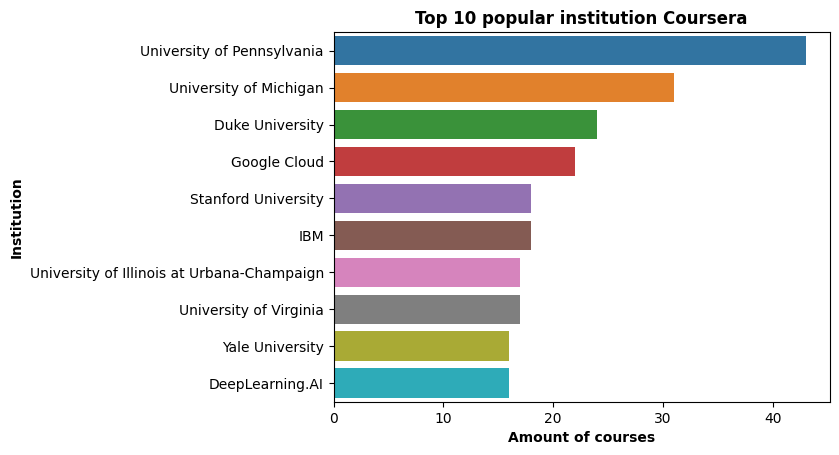

In [ ]:
sns.barplot(y=df_coursera['institution'].value_counts().head(10).index, 
            x=df_coursera['institution'].value_counts().head(10).values)
plt.title('Top 10 popular institution Coursera', weight='bold')
plt.xlabel('Amount of courses', weight='bold')
plt.ylabel('Institution', weight='bold')

Text(0, 0.5, 'Institution')

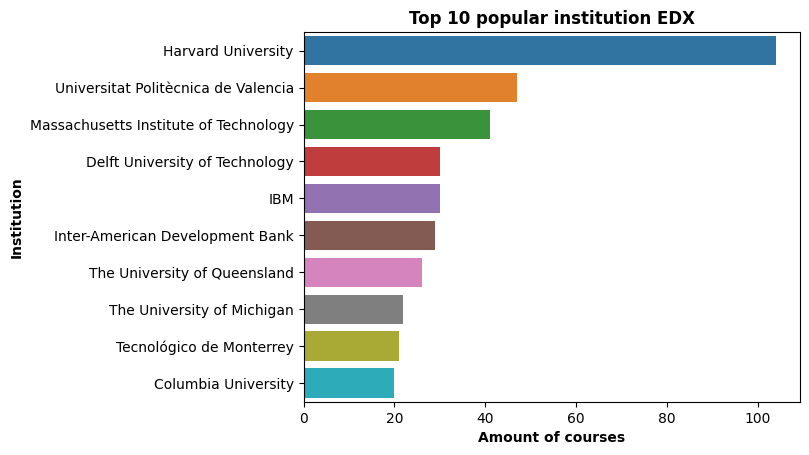

In [ ]:
sns.barplot(y=df_edx_courses['institution'].value_counts().head(10).index, 
            x=df_edx_courses['institution'].value_counts().head(10).values)
plt.title('Top 10 popular institution EDX', weight='bold')
plt.xlabel('Amount of courses', weight='bold')
plt.ylabel('Institution', weight='bold')

De estas gráficas se puede extraer información descriptiva sobre las instituciones con mayor peso en las MOOC, siendo Harvard University la mas recurrente en EDX y University of Pennsylvania la mas recurrente en Coursera. Ademas, Michigan e IBM aparecen en ambas plataformas.

Coursera distribución del rating 

In [39]:
df_coursera['promedio_rating'].mean().round(2)

4.63

En el siguiente grafico puede observarse la distribucion de la variable rating en el dataset Coursera. Se puede concluir que el grueso de los alumnos (que dejan una reseña) esta satisfecho con el curso, siendo la media 4.63.

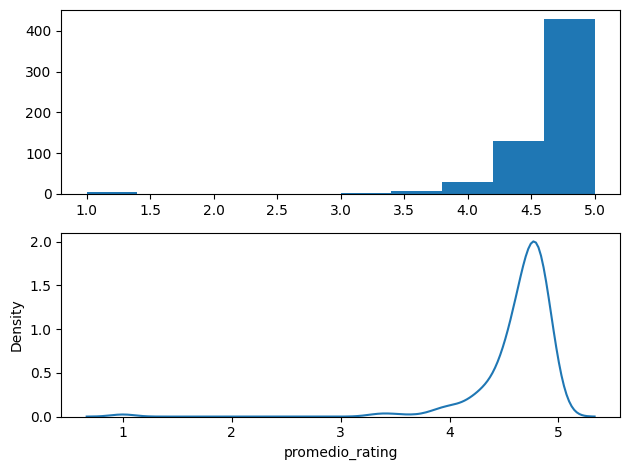

In [ ]:
plt.subplot(2, 1, 1) 
plt.hist(df_coursera['promedio_rating'])

plt.subplot(2, 1, 2) 
sns.kdeplot(df_coursera['promedio_rating'])

plt.tight_layout()

plt.show()

Top 20 institution según el rating

In [ ]:
df_institution = df_coursera.groupby('institution').mean().round(1)
df_institution.sort_values(by='promedio_rating', ascending=False, inplace=True)

C:\Users\Dell\AppData\Local\Temp\ipykernel_7420\3800542272.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_institution = df_coursera.groupby('institution').mean().round(1)


Del siguiente grafico se puede extraer como conclusion aquellas instituciones que mejor estan posicionadas segun el rating otorgado por los alumnos

Text(0, 0.5, 'Institution')

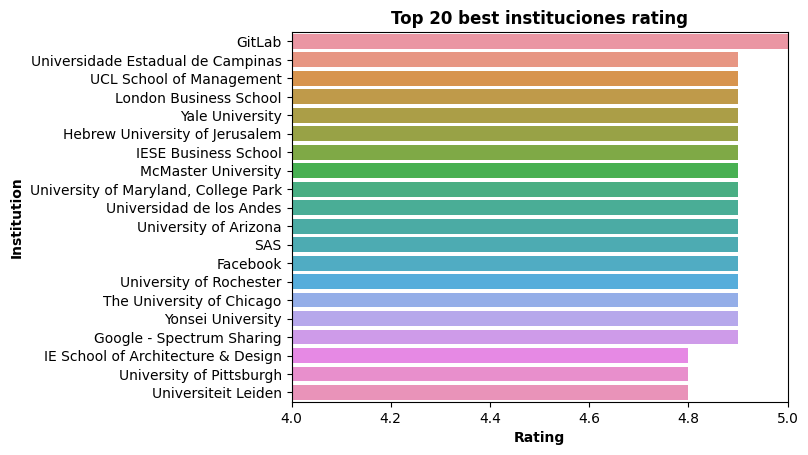

In [ ]:
sns.barplot(y=df_institution.head(20).index, 
            x=df_institution['promedio_rating'].head(20))
plt.xlim(4, 5)
plt.title('Top 20 best instituciones rating', weight='bold')
plt.xlabel('Rating', weight='bold')
plt.ylabel('Institution', weight='bold')

Top 10 cursos Coursera basados en el rating (Coursera)

In [ ]:
df_name = df_coursera.groupby('name').mean().round(1)
df_name.sort_values(by='promedio_rating', ascending=False, inplace=True)
df_name

Del siguiente grafico se puede extraer como conclusion aquellos cursos que mejor estan posicionadas segun el rating otorgado por los alumnos, se podria deducir que son aquellas temáticas que mas engagement y satisfacción logró crear. Es curioso ver la variedad de temáticas encontradas en el top 10, yendo desde programación, abogacía, economía y psicología.

Text(0, 0.5, 'Institution')

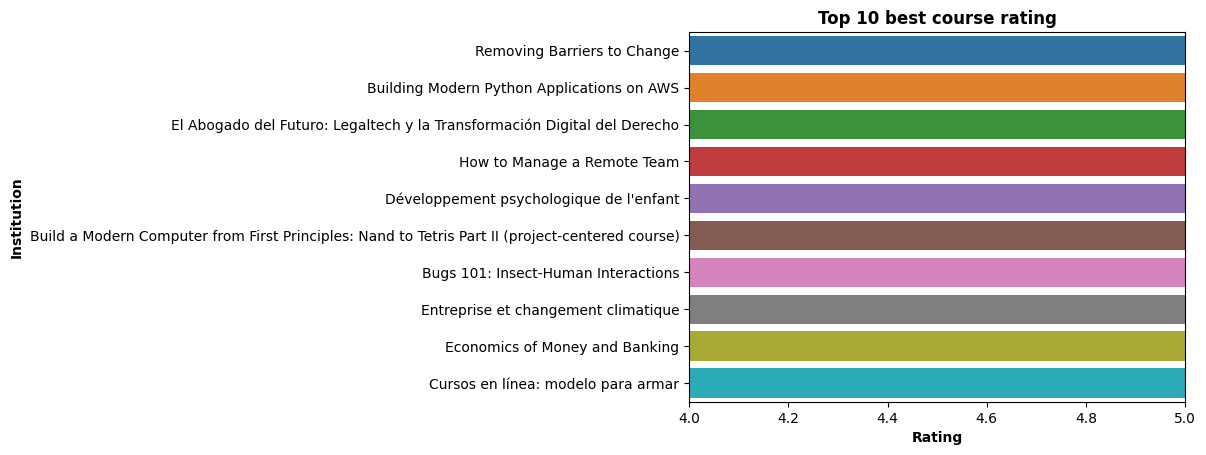

In [ ]:
sns.barplot(y=df_name.head(10).index, 
            x=df_name['promedio_rating'].head(10))
plt.xlim(4, 5)
plt.title('Top 10 best course rating', weight='bold')
plt.xlabel('Rating', weight='bold')
plt.ylabel('Institution', weight='bold')

Conversión de variables para seguir con el análisis y creación de nuevas columnas

In [41]:
#conversión cantidad de suscriptores a float
df_edx_courses['n_enrolled'] = df_edx_courses['n_enrolled'].str.replace(',', '')
df_edx_courses['n_enrolled'] = df_edx_courses['n_enrolled'].astype('float64')

In [9]:
#crear columna year
df_udemy_courses['year'] = pd.to_datetime(df_udemy_courses['published_timestamp'])
df_udemy_courses['year'] = df_udemy_courses['year'].dt.year

In [10]:
#crear columna sales_total
df_udemy_courses['sales_total']= ''

def sales(row):
    return (row['price']*row['num_subscribers'])
        
df_udemy_courses['sales_total'] = df_udemy_courses.apply(sales, axis=1)

Análisis en función de la cantidad de inscriptos de Udemy y EDX

EDX, según temática en función de la cantidad de inscriptos

In [44]:
df_subject = df_edx_courses.groupby('subject').mean().round(2)
df_subject.sort_values(by='n_enrolled', ascending=False, inplace=True)
df_subject

C:\Users\Dell\AppData\Local\Temp\ipykernel_13100\1288110079.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_subject = df_edx_courses.groupby('subject').mean().round(2)


,n_enrolled
subject,
Communication,132609.34
Architecture,114152.75
Computer Science,82984.91
Data Analysis & Statistics,71073.53
Humanities,56518.39
Biology & Life Sciences,51877.41
Business & Management,48469.61
Literature,47898.00
Medicine,43033.26


Text(0, 0.5, 'Temática')

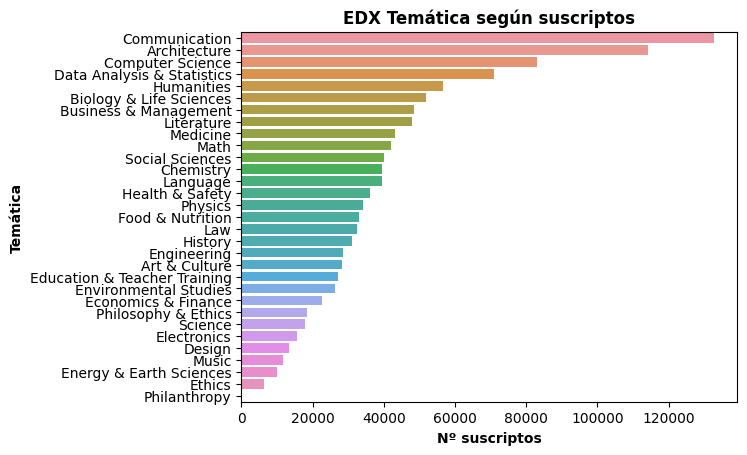

In [45]:
sns.barplot(y=df_subject.index, 
            x=df_subject['n_enrolled'])
#plt.xlim(4, 5)
plt.title('EDX Temática según suscriptos', weight='bold')
plt.xlabel('Nº suscriptos', weight='bold')
plt.ylabel('Temática', weight='bold')

Del gráfico anterior pueden extraerse las temáticas/áreas con mayor cantidad de inscriptos: Comunicación, Arquitectura, Ciencias de la Computación y Análisis de Datos y Estadísticas. Además, las materias con menos cantidad de inscriptos son: música, energía y ciencia de la tierra, ética y filantropía.

EDX, según nivel en función de la cantidad de inscriptos

C:\Users\Dell\AppData\Local\Temp\ipykernel_13100\2461568623.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_level = df_edx_courses.groupby('Level').mean().round(2)


Text(0, 0.5, 'Nivel')

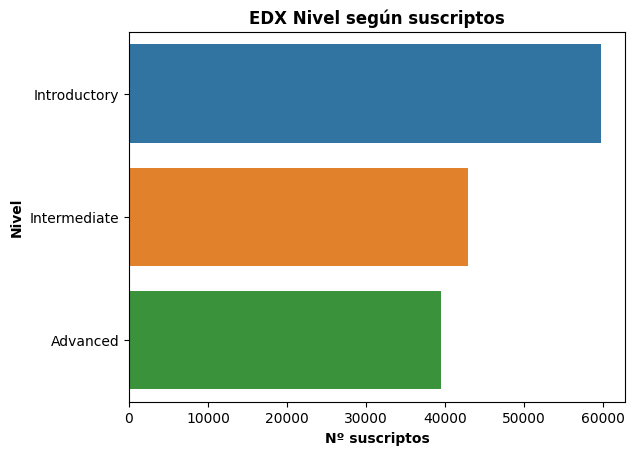

In [46]:
df_level = df_edx_courses.groupby('Level').mean().round(2)
df_level.sort_values(by='n_enrolled', ascending=False, inplace=True)

sns.barplot(y=df_level.index, 
            x=df_level['n_enrolled'])
plt.title('EDX Nivel según suscriptos', weight='bold')
plt.xlabel('Nº suscriptos', weight='bold')
plt.ylabel('Nivel', weight='bold')

Se puede observar que la cantidad de inscriptos es mayor en cursos con nivel introductorio y a medida que se complejizan va disminuyendo el número de alumnos

EDX, según idioma en función de la cantidad de inscriptos

In [47]:
#Cambiar idiomas en idioma original a español

df_edx_courses['language'] = df_edx_courses['language'].str.replace('日本語', 'japones')
df_edx_courses['language'] = df_edx_courses['language'].str.replace('中文', 'chino')
df_edx_courses['language'] = df_edx_courses['language'].str.replace('اللغة العربية', 'arabe')

C:\Users\Dell\AppData\Local\Temp\ipykernel_13100\4177694659.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_language = df_edx_courses.groupby('language').mean().round(2)


Text(0, 0.5, 'Idioma')

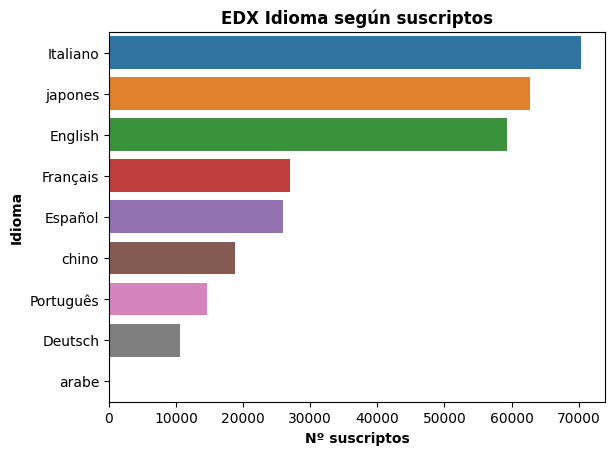

In [48]:
df_language = df_edx_courses.groupby('language').mean().round(2)
df_language.sort_values(by='n_enrolled', ascending=False, inplace=True)

sns.barplot(y=df_language.index, 
            x=df_language['n_enrolled'])
plt.title('EDX Idioma según suscriptos', weight='bold')
plt.xlabel('Nº suscriptos', weight='bold')
plt.ylabel('Idioma', weight='bold')

Podemos concluir que los idiomas más elegidos por los suscriptores para sus cursos son el italiano, el japonés y el inglés

Análisis variables UDEMY

Crear mapa de calor para encontrar variables correlacionadas y hacer énfasis en ellas

Se puede encontrar una correlacion alta entre el num_lectures y el content_duration lo cual tiene una base lógica. Y tambien entre las variables num_subscribers y num_reviews.

C:\Users\Dell\AppData\Local\Temp\ipykernel_13100\3200322573.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_udemy_courses.corr()


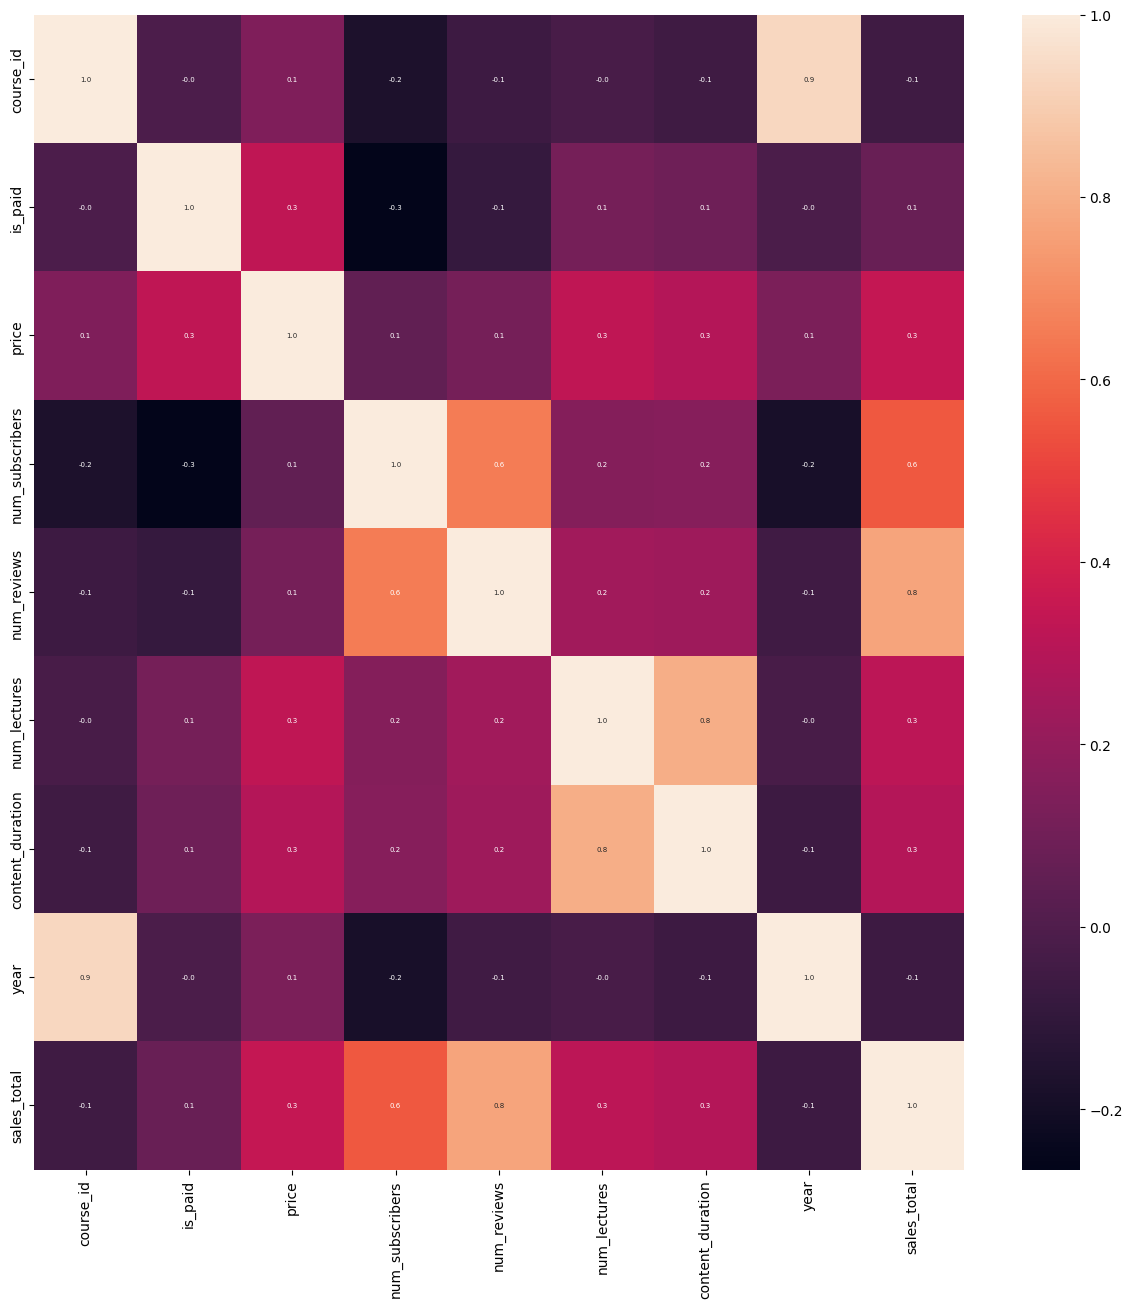

In [49]:
corr = df_udemy_courses.corr()
plt.figure(figsize = (15,15))
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        fmt= '.1f',annot_kws={'size': 5},
        annot=True);

El siguiente gráfico permite tener un rápido vistazo de la relación entre las variables. En este caso, vemos la relación entre el precio, el número de suscriptores, el número de reseñas, la duración del contenido y las ventas totales.

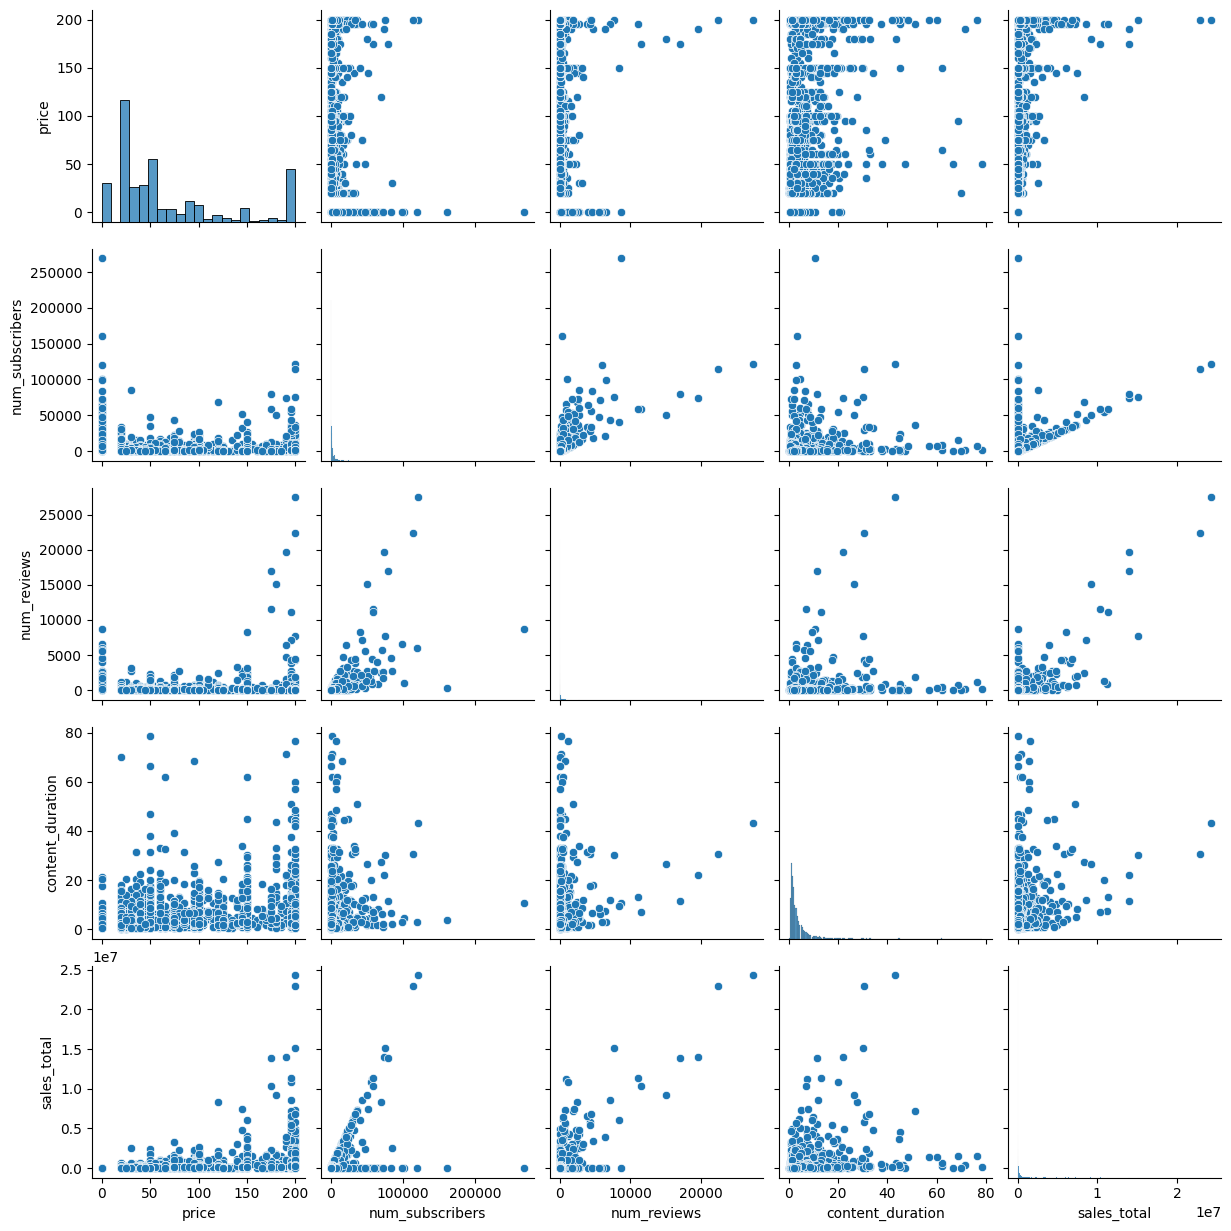

In [50]:
data= df_udemy_courses[['price', 'num_subscribers', 'num_reviews', 
                        'content_duration', 'sales_total']]

sns.pairplot(data=data)

Podemos observar la relación entre el precio y la cantidad de suscriptores del curso, viendo que es mayor en aquellos cursos gratuitos pero también hay mayor cantidad en algunos de los cursos más costosos (190-200USD)

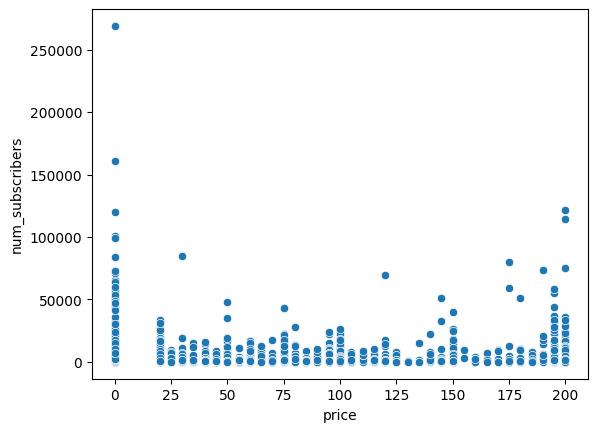

In [ ]:
ax = sns.scatterplot(x="price", y="num_subscribers", data=df_udemy_courses)

El siguiente gráfico tambien muestra la distribución de los precios y los suscriptores pero en función a los subjects y se puede observar un claro predominio de la temática Web Development

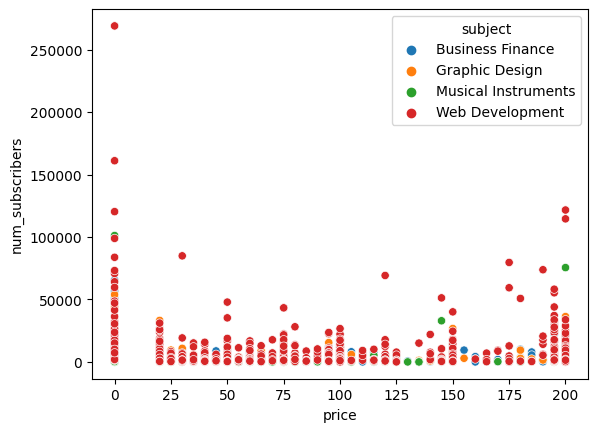

In [ ]:
ax = sns.scatterplot(x="price", y="num_subscribers", data=df_udemy_courses, hue= 'subject')

En la siguiente tabla se pueden observar algunas variaciones según mediciones basadas en los años, vemos como las ventas alcanzaron su punto maximo en el año 2015-2016 y como en 2017 disminuyeron. Tambien el numero de suscriptores y de reviews disminuyo luego del 2016.

In [11]:
df_ventas = df_udemy_courses.groupby('year').sum().round(2)
df_ventas.sort_values(by='year', ascending=True, inplace=True)

df_ventas

C:\Users\Dell\AppData\Local\Temp\ipykernel_12508\2925217215.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ventas = df_udemy_courses.groupby('year').sum().round(2)


,course_id,is_paid,price,num_subscribers,num_reviews,num_lectures,content_duration,sales_total
year,,,,,,,,
2011,50451,5,310,119028,4041,574,51.00,11643420
2012,985720,41,1835,555339,10272,2374,278.83,11773470
2013,15642586,185,10860,1723438,48585,7261,1010.20,72652195
2014,119466463,439,23800,1930406,86667,19288,2189.13,106939045
2015,532314761,952,67830,3475324,196810,41930,3890.60,314510395
2016,1013416761,1109,84210,2966644,195429,50854,5085.98,276633190
2017,804348139,637,54085,988941,32917,25239,2553.88,90769600


Normalizar variables para graficarlas

In [12]:
from sklearn.preprocessing import MinMaxScaler

data = df_ventas[['sales_total', 'num_subscribers', 'num_reviews']]

# Normalizar las variables utilizando la normalización min-max
scaler = MinMaxScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

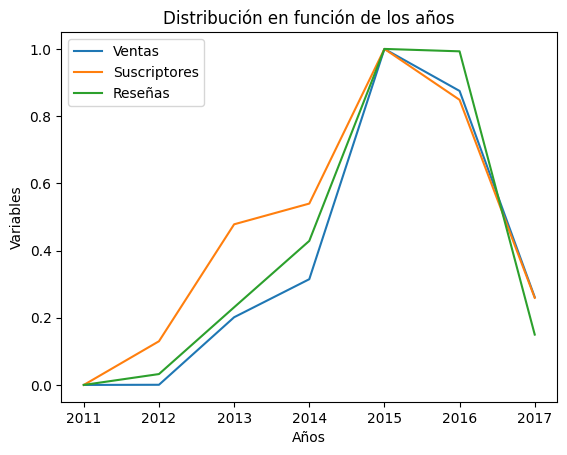

In [13]:
x= df_ventas.index
y1= df_normalized['sales_total']
y2= df_normalized['num_subscribers']
y3= df_normalized['num_reviews']


# Crear el gráfico de líneas
plt.plot(x, y1, label='Ventas')
plt.plot(x, y2, label='Suscriptores')
plt.plot(x, y3, label='Reseñas')

# Configurar etiquetas y título
plt.xlabel('Años')
plt.ylabel('Variables')
plt.title('Distribución en función de los años')
plt.legend()  # Mostrar la leyenda

# Mostrar el gráfico
plt.show()

En el gráfico se muestra la distribución de tres variables en función de los años: ventas, cantidad de suscriptores y cantidad de reseñas

Graficar comparación de precios en función de si es mayor o menor a 100USD 

In [ ]:
# Seleccionamos los cursos con precio menor a 100USD
curso_menos_100 = df_udemy_courses[df_udemy_courses['price']<100]
# Seleccionamos los cursos con precio mayor a 100USD
curso_mas_100 = df_udemy_courses[df_udemy_courses['price']>=100]

# Armamos los vectores con los precios de cada vino
precios_menos_100 = curso_menos_100.price.values
precios_mas_100 = curso_mas_100.price.values

print('Cantidad de cursos menos 100USD:',len(curso_menos_100))
print('Cantidad de cursos mas 100USD:',len(curso_mas_100))

Cantidad de cursos menos 100USD: 2822
Cantidad de cursos mas 100USD: 856


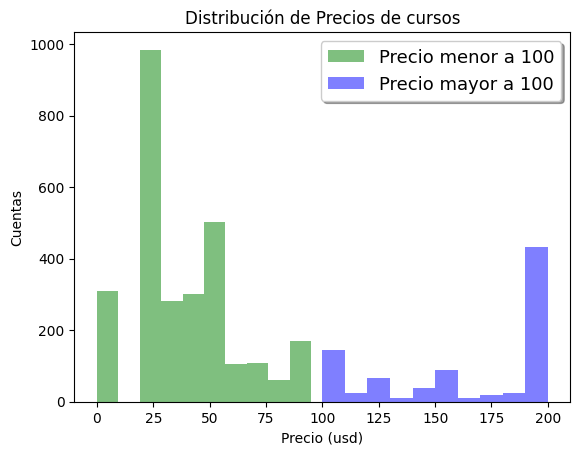

In [ ]:
# Creamos la figura y los ejes
fig, ax = plt.subplots()

n, bins, _ = ax.hist(precios_menos_100, facecolor='g', alpha=0.5, label='Precio menor a 100')
n, bins, _ = ax.hist(precios_mas_100, facecolor='b', alpha=0.5, label='Precio mayor a 100')

ax.set(xlabel='Precio (usd)', ylabel='Cuentas',
       title='Distribución de Precios de cursos') #, xlim = (0,75))

# Agregamos la leyenda al gráfico, la graficamos abajo a la derecha
ax.legend(loc='upper right', shadow=True, fontsize=13)

Podemos observar que es mayoritaria la cantidad de cursos de menor valor, siendo de 25 USD la mayoria de los cursos otorgados en Udemy (cerca de 1000)

Creación de una nube de palabras con los títulos de los cursos

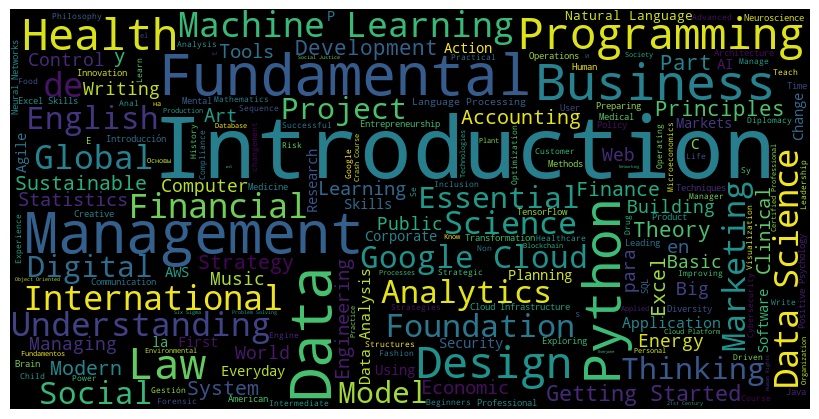

In [ ]:
#Crear variable a mostrar, borrando nulos y convirtiendo a string.
data = df_coursera['name'].dropna().to_string()

#Crear nube de palabras
wordcloud = WordCloud(stopwords= STOPWORDS, width=800, height=400, background_color='black').generate(data)

plt.figure(figsize=(8,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

De la siguiente wordcloud se pueden destacar ciertas palabras clave: introduction, fundamental, business, management, data, Python, programming, entre otras

Creación de la columna: tasa de conversion. La cual referencia al primer KPI del análisis de los datos, es la conversión de los inscriptos gratuitos a los inscriptos pagados.

In [51]:
cursos_pagados = df_udemy_courses[df_udemy_courses['is_paid']==True]['num_subscribers'].sum()
cursos_gratuitos= df_udemy_courses[df_udemy_courses['is_paid']==False]['num_subscribers'].sum()

tasa_conversion= cursos_pagados/cursos_gratuitos
tasa_conversion

2.2887813677711666

Exportar CSV para el trabajo en PowerBI

In [52]:
df_udemy_courses.to_csv('udemy.csv', index=False)
df_coursera.to_csv('coursera.csv', index=False)
df_edx_courses.to_csv('edx.csv', index=False)